In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# Investigating Chaotic Systems
## The Hallmarks of Choas
* Determinism - if conditions are infinitely precise, rerunning the system will yield the same result (not like querying a random number generator)
* Boundedness - they do not blow up to inifity
* Irregularity or Semi-regularity
* Highly sensitive to innitial conditions
* Characterized by attractor manifolds
    * Strange Atrractor - a picture tells a story

In [3]:
# Define Lorenx system

def lorenz(state, t0, sigma = 10., beta = 8./3., rho = 28.0):

    # unpack state variables
    x = state[0]
    y = state[1]
    z = state[2]

    # Lorenz equations
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z

    return [dxdt, dydt, dzdt]


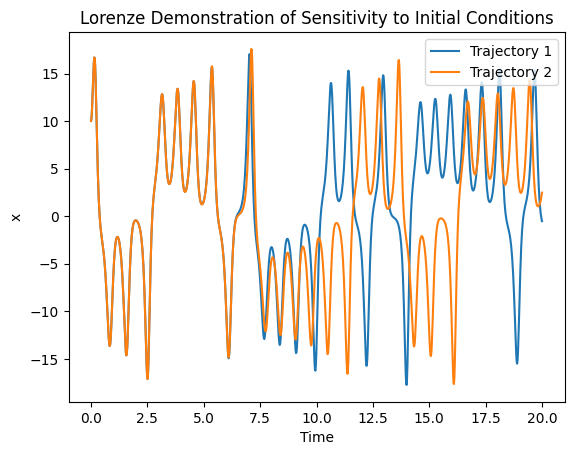

In [4]:
# demonstrate that there is sensitivity to initial conditions
N_trajectories = 2

# vector of the initial conditions
state0 = 10 + 0.01 * np.random.random((N_trajectories, 3)) # Lorenz initial conditions

# generate a time vector to integrate over
t = np.linspace(0, 20, 1000)

# use an in line forloop to simulate multiple systems with different initial conditions
state = np.asarray([odeint(lorenz, state0i, t)
                    for state0i in state0])

# plot the results
# state is a 3D array, the first dim is the trajectiry number, the second is time, 
# and the third is the state variable
plt.plot(t, state[0, :, 0])
plt.plot(t, state[1, :, 0])

plt.legend(('Trajectory 1', 'Trajectory 2'))
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Lorenze Demonstration of Sensitivity to Initial Conditions')
plt.show()

In [ ]:
# def aizawa(state, t0, a = 0.95, b = 0.7, c = 0.6, d = 3.5, e = 0.25, f = 0.1):
#     x = state[0]
#     y = state[1]
#     z = state[2]

#     dxdt = (z - b) * x - d * y
#     dydt = d * x + (z - b) * y
#     dzdt = c + a * z - (1/3) * z**3 - (x**2 + y**2) * (1 + e * z) + f * z * x**3

#     return [dxdt, dydt, dzdt]

# # x0 = 0.1 + np.random.random((N_trajectories, 3))

# # demonstrate that there is sensitivity to initial conditions
# N_trajectories = 2

# # vector of the initial conditions
# state0 = 0.1 + np.random.random((N_trajectories, 3))

# # generate a time vector to integrate over
# t = np.linspace(0, 100, 10000)

# # use an in line forloop to simulate multiple systems with different initial conditions
# state = np.asarray([odeint(aizawa, state0i, t)
#                     for state0i in state0])

# # plot the results
# # state is a 3D array, the first dim is the trajectiry number, the second is time, 
# # and the third is the state variable
# plt.figure(figsize = (15, 5))
# plt.plot(t, state[0, :, 0])
# plt.plot(t, state[1, :, 0])

# plt.legend(('Trajectory 1', 'Trajectory 2'))
# plt.xlabel('Time')
# plt.ylabel('x')
# plt.title('Lorenze Demonstration of Sensitivity to Initial Conditions')
# plt.show()


# Is Predictive Science Useless?

## No!
There are both quantitative and qualitative methods for characterizing chaotic systems

1) Lyaponov exponents
2) Poincare Maps
3) Descriptions of the attractor

# Lyaponov Exponents

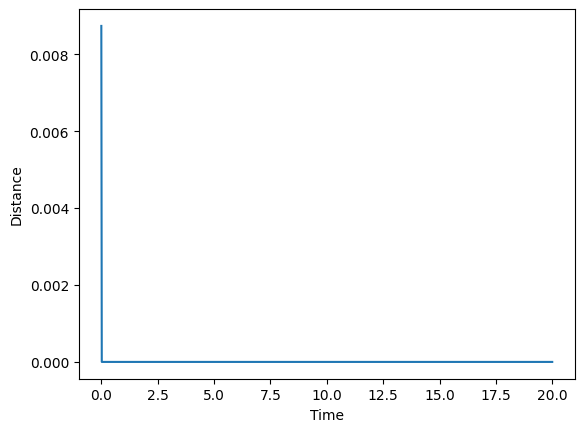

In [5]:
from scipy.spatial import distance

def compute_dst(state):
    # compute the euclidean distance between two or more trajectories

    dst = np.zeros((1, state.shape[1])) # initialize the distance array

    # loop over time 
    for i in np.arange(0, state.shape[1]):
        dst[0, i] = distance.euclidean(state[0, i, :], state[1, i, :]) # compute the distance between two trajectories at time i

        return (dst.T)

dst = compute_dst(state)
plt.plot(t, dst)
plt.xlabel('Time')
plt.ylabel('Distance')
plt.show()

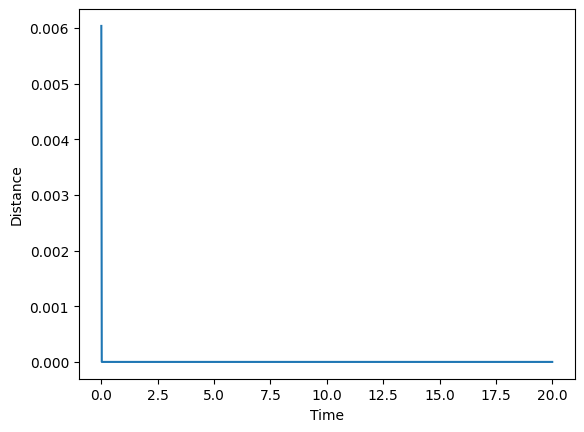

In [6]:
# demonstrate the relationship between ICs and time to diverge

# demonstrate that there is sensitivity to initial conditions
N_trajectories = 2

# vector of the initial conditions
state0 = 10 + 0.01 * np.random.random((N_trajectories, 3)) # Lorenz initial conditions

# generate a time vector to integrate over
t = np.linspace(0, 20, 1000)

# use an in line forloop to simulate multiple systems with different initial conditions
state = np.asarray([odeint(lorenz, state0i, t)
                    for state0i in state0])

# plot the results
# state is a 3D array, the first dim is the trajectiry number, the second is time, 
# and the third is the state variable
dst = compute_dst(state)
plt.plot(t, dst)
plt.xlabel('Time')
plt.ylabel('Distance')
plt.show()

In [7]:
# lets simulate a huge number of trajectories and look at divergence

t = np.linspace(0, 50, 10000)
D = np.zeros((len(t), 100))

for i in np.arange(0, 100):
    state0i = 10 + 0.01*np.random.random((N_trajectories, 3))
    state = np.asarray([odeint(lorenz, state0i, t)
                        for state in state0i in state0])

dst = compute_dst(state)

D[:,i] = dst[:, 0]

plt.plot(dst)

TypeError: 'bool' object is not iterable

/var/folders/sw/yf60_nh53c543ptzhw6txfhm0000gn/T/ipykernel_92971/3730773771.py:4: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.ylim(0, 20)
/var/folders/sw/yf60_nh53c543ptzhw6txfhm0000gn/T/ipykernel_92971/3730773771.py:4: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 20)


Text(0, 0.5, 'Mean Divergence Between Points')

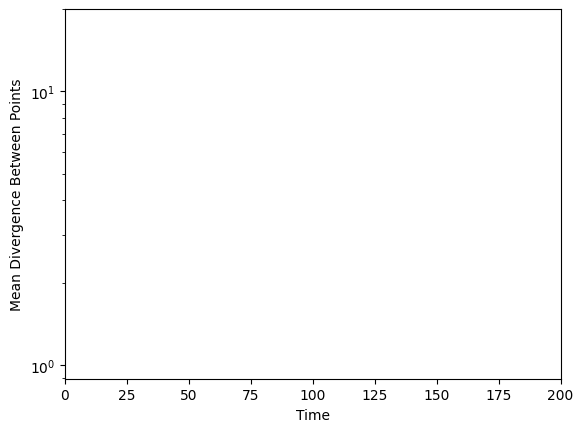

In [8]:
# plot the mean divergence in log space

plt.semilogy(t, np.mean(D, axis = 1))
plt.ylim(0, 20)
plt.xlim(0, 200)
plt.xlabel('Time')
plt.ylabel('Mean Divergence Between Points')

Text(0.5, 0, 'Time')

/Users/mkayeterry/Library/Python/3.10/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


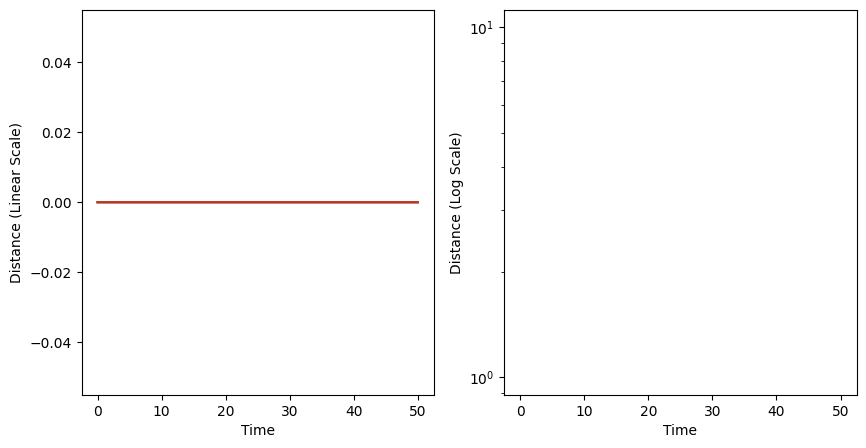

In [9]:
# The relationship between log and linear space
D0 = np.mean(D[0, :])

plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
for lyapunov in np.arange(0.1, 0.5, 0.1):
    plt.plot(t, D0*np.exp(lyapunov*t))
plt.ylabel('Distance (Linear Scale)')
plt.xlabel('Time')

plt.subplot(1, 2, 2)
for lyapunov in np.arange(0.1, 0.5, 0.1):
    plt.semilogy(t, D0*np.exp(lyapunov*t))
plt.ylabel('Distance (Log Scale)')
plt.xlabel('Time')

/var/folders/sw/yf60_nh53c543ptzhw6txfhm0000gn/T/ipykernel_92971/1366599689.py:5: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xlim(0, 20)
/var/folders/sw/yf60_nh53c543ptzhw6txfhm0000gn/T/ipykernel_92971/1366599689.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 200)


Text(0, 0.5, 'Distnace')

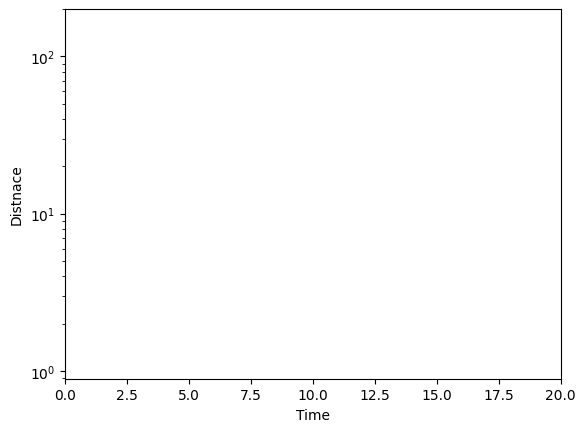

In [10]:
lyapunov = 0.9

plt.semilogy(t, D0*np.exp(lyapunov*t))

plt.xlim(0, 20)
plt.ylim(0, 200)


# plot distance
plt.semilogy(t, np.mean(D, axis = 1))

plt.xlabel('Time')
plt.ylabel('Distnace')

In [13]:
#################################################################################################
# Lecture 11:
#################################################################################################

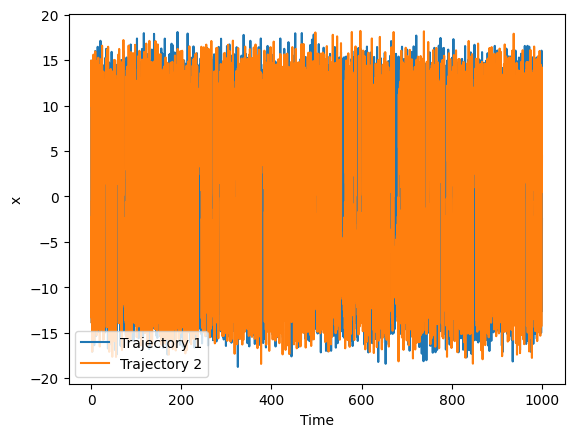

In [24]:
# demonstrate the relationship between ICs and time to diverge

# demonstrate that there is sensitivity to initial conditions
N_trajectories = 2

# vector of the initial conditions
state0 = 10 + 0.01 * np.random.random((N_trajectories, 3)) # Lorenz initial conditions

# generate a time vector to integrate over
t = np.linspace(0, 1000, 10000)

# use an in line forloop to simulate multiple systems with different initial conditions
state = np.asarray([odeint(lorenz, state0i, t)
                    for state0i in state0])

plt.plot(t, state[0,:,0])
plt.plot(t, state[1,:,0])

plt.legend(('Trajectory 1', 'Trajectory 2'))

plt.xlabel('Time')
plt.ylabel('x')
plt.show()

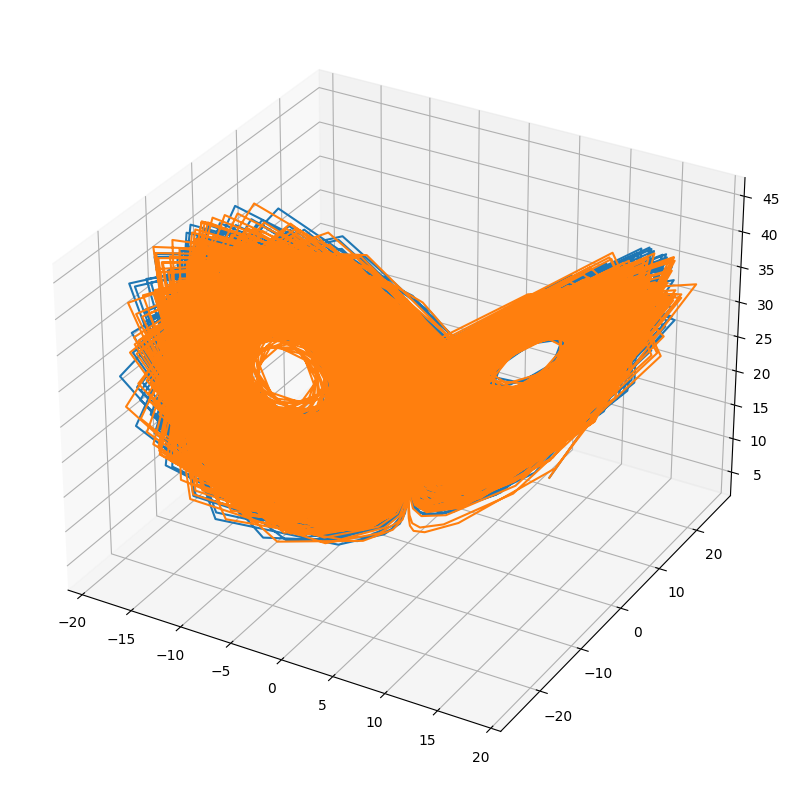

In [25]:
fig = plt.figure(figsize = (10,10))

ax = plt.axes(projection = '3d')


for i in range(0, N_trajectories):
    plt.plot(state[i, :, 0], state[i, :, 1], state[i, :, 2])


# intuition on why strange attractors lead to sensitivity to ICs
# trajectories orbit sub-manifolds of the attractor
# eventually one trajectory is 'sucked over' to the other side orbitting now a differing sub-manifold

# intuitively, this leads us to conclude that chaotic systems can be constructed by oscilating systems that are interrelated

    

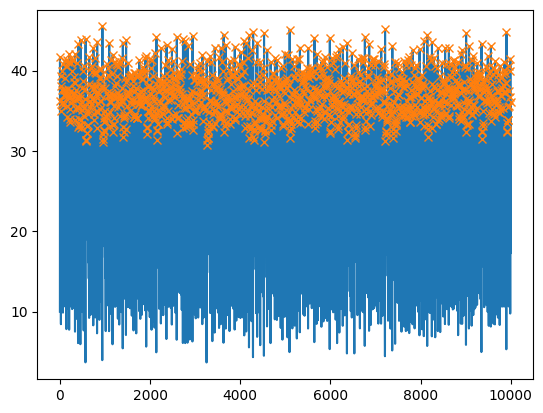

In [36]:
# Lorenz Map - another technique to have some future state predictive ability

# this technique only looks at a single dimension of the system
z = state[0, :, 2]

from scipy.signal import find_peaks

peaks, _ = find_peaks(z, height = 15)

plt.plot(z)
plt.plot(peaks, z[peaks], 'x')

# lower peaks tend to move up to lower peaks, higher peaks tend to move down to lower peaks (this is predictable)

Text(0.5, 0, 'Nth Z Peak Height')

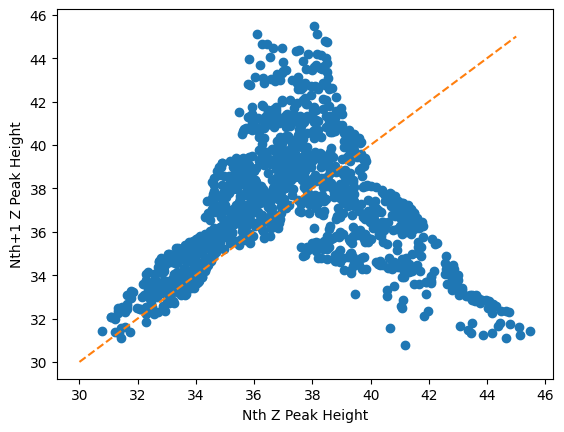

In [37]:
# defining lorenz map

firstPeak = z[peaks[:-1]]
secondPeak = z[peaks[1:]]

plt.plot(firstPeak, secondPeak, 'o')
plt.plot(np.linspace(30,45), np.linspace(30,45), '--')
plt.ylabel('Nth+1 Z Peak Height')
plt.xlabel('Nth Z Peak Height')



# Holling-Tanner System

*Plants*  
$\dot{x} = x(1-x) - \frac{a_1x}{1+b_1x}y$  

*Herbivores*  
$\dot{y} = \frac{a_1x}{1+b_1x}y - d_1y-\frac{a_2y}{1+b_2y}z$  

*Carnivores*  
$\dot{z} = \frac{a_2y}{1+b_2y}z - d_2z$

In [44]:
# define the HT 

def HollingTanner(state, t, a1=5, b1=3, a2=0.1, b2=2, d1=0.4, d2=0.01):

    # unpack state variables
    x = state[0]
    y = state[1]
    z = state[2]

    # plants
    # first term is a growth to K term, logistic curve
    # second term is predation term, sigmoidal curve
    dxdt = x * (1 - x) - ((a1 * x)/(1 + (b1 * x))) * y

    # herbivores
    dydt = (((a1 * x)/(1 + (b1 * x))) * y) - (d1 * y) - ((a2 * y)/(1 + (b2 * y))) * z

    # carnivores
    dzdt = (((a2 * y)/(1 + (b2 * y))) * z) - (d2 * z)

    return [dxdt, dydt, dzdt]

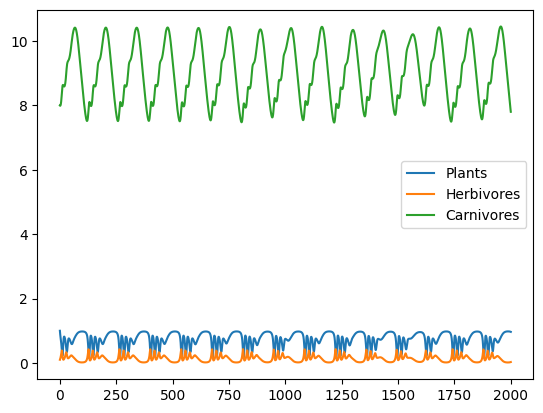

In [45]:
t = np.linspace(0, 2000, 100000)
state0 = np.array([1, 0.1, 8])

# run the simulation
state = odeint(HollingTanner, state0, t)

plt.plot(t, state)
plt.legend(('Plants', 'Herbivores', 'Carnivores'))


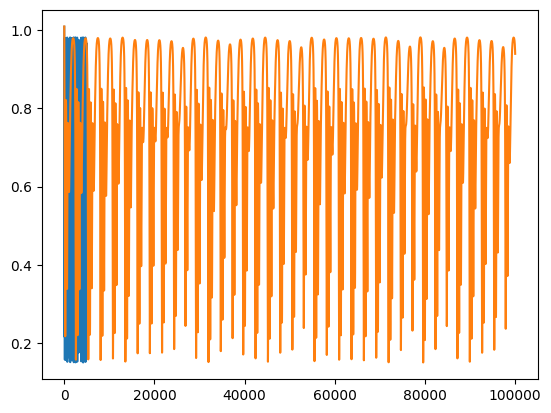

In [50]:
# estimate the Lyapunov exponent for the HT model
N_trajectories = 100
t = np.linspace(0, 5000, 100000)

state0 = np.array([1, 0.1, 8]) + 0.01*np.random.random((N_trajectories, 3))

state = np.asarray([odeint(HollingTanner, state0i, t)
                    for state0i in state0])

plt.plot(t, state[0, :, 0])
plt.plot(state[1, :, 0])


/var/folders/sw/yf60_nh53c543ptzhw6txfhm0000gn/T/ipykernel_92971/1479620052.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10)


(0.00161175544023329, 10)

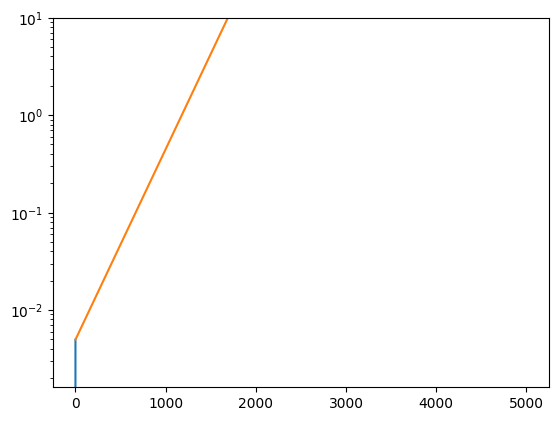

In [53]:
dst = compute_dst(state)
plt.semilogy(t, dst)

lyapunov = 0.0045
D0 = np.mean(dst[0])
plt.semilogy(t, D0*np.exp(lyapunov*t))

plt.ylim(0, 10)

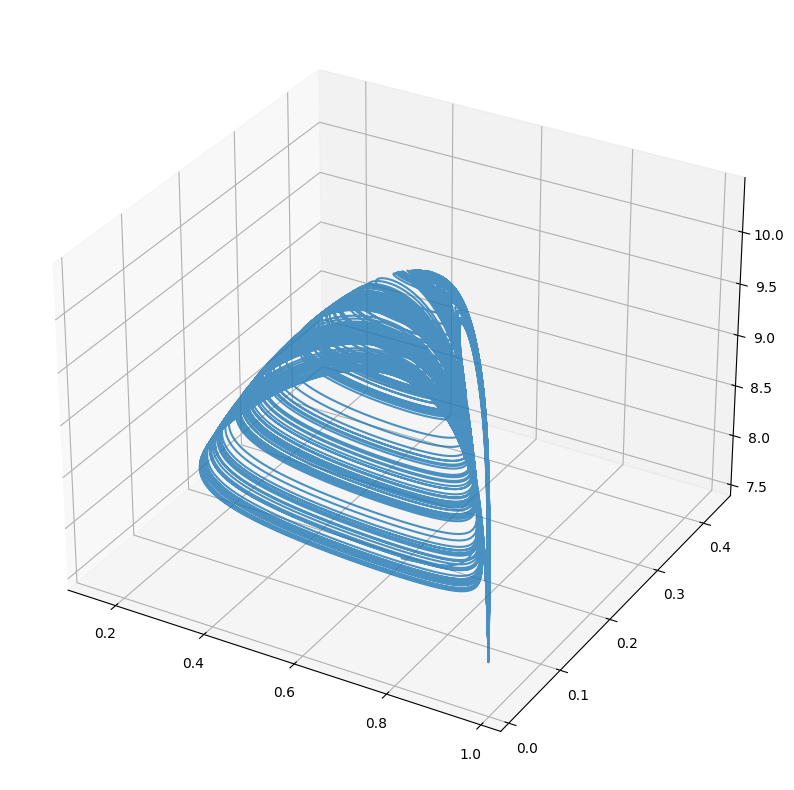

In [55]:
# analyze the HT attractor

t = np.linspace(0, 5000, 100000)
state0 = np.array([0.7, 0.1, 8])
state = odeint(HollingTanner, state0, t)

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection = '3d')

plt.plot(state[:,0], state[:,1], state[:,2], alpha = 0.8)

Text(0.5, 0, 'Carnivores')

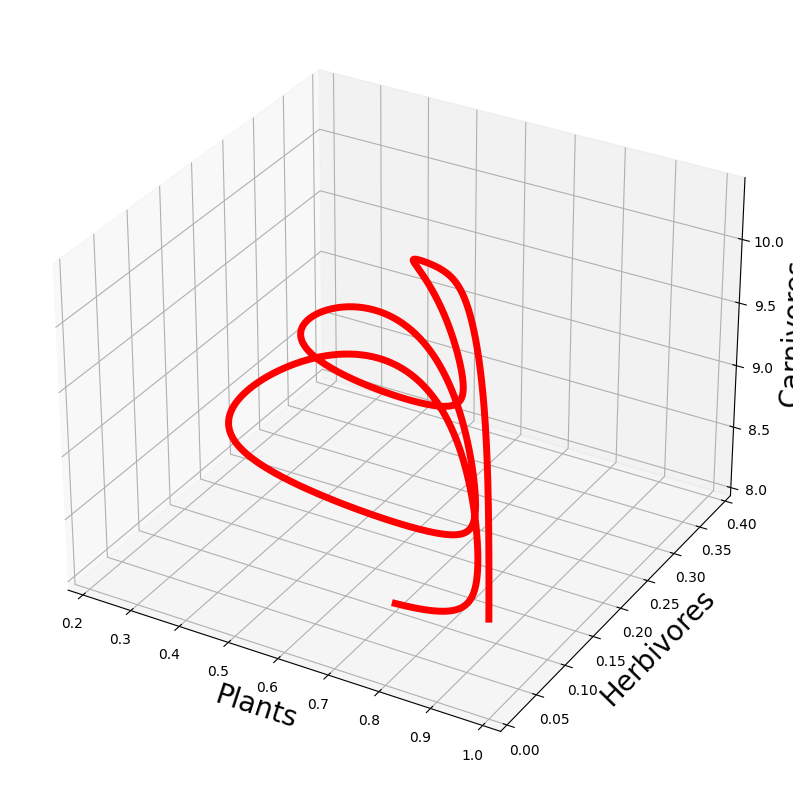

In [58]:
# a picture tells a story

tend = 2000

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection = '3d')

plt.plot(state[0:tend,0], state[0:tend,1], state[0:tend,2], color = 'r', linewidth = 5)

ax.set_ylabel('Herbivores', fontsize = 20)
ax.set_xlabel('Plants', fontsize = 20)
ax.set_zlabel('Carnivores', fontsize = 20)


In [59]:
# demonstration chaos in the FHN neuron

def fitzHughNaguma(state, t):
    v = state[0]
    w = state[1]

    dv = -v * (v - a) * (v - 1) - w + pulse(t, tOn, tOff, IOn, IOff)
    dw = eps * (v - gamma * w)

    return(dv, dw)

def pulse(t, tOn, tOff, uOn, uOff):

    if (t%(tOn+tOff)) < tOn:
        u = uOn

    elif (t%(tOn+tOff) >= tOn):
        u = uOff

        return uOff

def computeI(t):
    I = np.zeros(len(t))
    for i in np.arange(0, len(t), 1):
        I[i] = pulse(t[i], tOn, tOff, IOn, IOff)

    return I

In [60]:
# define some parameters ans imulate the chaotic neuron

eps = 0.01
a = 0.1
gamma = 2

tOn = 10
tOff = 15
IOn = 0.04
IOff = 0

state0 = [0, 0]

t = np.linspace(0, 1000, 100000)

state = odeint(fitzHughNaguma, state0, t)

plt.plot(t, state[:,0])
plt.plot(t, computeI(t))

plt.ylim(-.3, 1)



TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

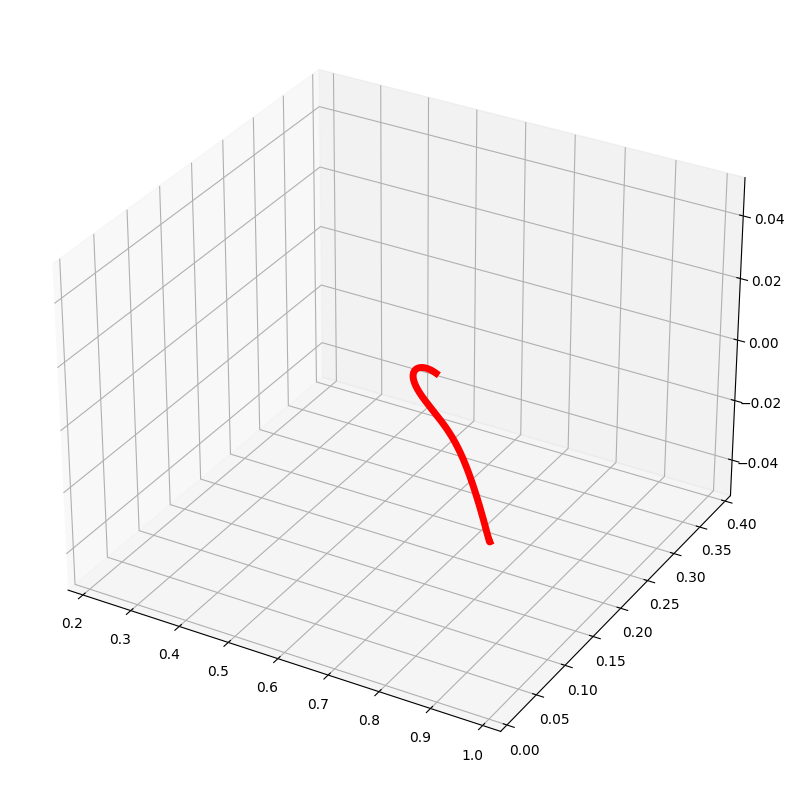

In [62]:
fig = plt.figure(figsize = (10, 10))

ax = plt.axes(projection = '3d')

I = computeI(t)
plt.plot(state[0:2000, 0], state[0:2000, 1], I[0:2000], color = 'r', linewidth = 5)